# Quantum Volume

**Quantum Volume (QV)** is a single-number metric that can be measured using a concrete protocol
on near-term quantum computers of modest size. The QV method quantifies the largest random
circuit of equal width and depth that the computer successfully implements.
Quantum computing systems with high-fidelity operations, high connectivity,
large calibrated gate sets, and circuit rewriting toolchains are expected to
have higher quantum volumes.
See [Qiskit Textbook](https://learn.qiskit.org/course/quantum-hardware/measuring-quantum-volume) for an explanation on the QV method, which is described in Ref. [1, 2].

The Quantum Volume is determined by the largest successful circuit depth $d_{max}$, and equals to $2^{d_{max}}$.
In the QV experiment we generate [QV circuits](https://qiskit.org/documentation/stubs/qiskit.circuit.library.QuantumVolume.html) on $d$ qubits, which contain $d$ layers, where each layer consists of random 2-qubit unitary gates from $SU(4)$, followed by a random permutation on the $d$ qubit. 
Then these circuits run on the quantum backend and on an ideal simulator (either `AerSimulator` or `qiskit.quantum_info.Statevector`).

A depth $d$ QV circuit is successful if it has 'mean heavy-output probability' > 2/3 with confidence
level > 0.977 (corresponding to z_value = 2), and at least 100 trials have been ran.

In [2]:
from qiskit_experiments.framework import BatchExperiment
from qiskit_experiments.library import QuantumVolume
from qiskit import Aer
from qiskit.providers.aer import AerSimulator

# For simulation
from qiskit.test.mock import FakeSydney
backend = AerSimulator.from_backend(FakeSydney())

## QV experiment

To run the QV experiment we need need to provide the following QV parameters, in order to generate the QV circuits and run them on a backend and on an ideal simulator:

- `qubits`: The number of qubits or list of physical qubits for the experiment.

- `trials`: The number of trials to run the quantum volume circuit (the default is 100).
            
- `seed`: Seed or generator object for random number generation. If `None` then `default_rng` will be used.

- `simulation_backend`: The simulator backend to use to generate the expected results. the simulator must have a `save_probabilities` method. If None `AerSimulator` simulator will be used
(in case `AerSimulator` is not installed `qiskit.quantum_info.Statevector` will be used).

**Note:** In some cases, 100 trails are not enough to obtain a QV greater than 1 for the specified number of qubits. In this case, adding more trials may reduce the error bars to allow passing the threshold. 

The output of the QV Experiment includes:

- The calculated quantum volume

- Confidence level (should be greater than 0.977)

- The heavy output probabilities (hop)

- The mean hop and standard deviation

- `sucess=True` if the QV circuit was successful


Analysis Result: QuantumVolume
Analysis Result ID: 5a17a40a-36f4-45e8-aafc-6a38bcc63655
Experiment ID: 62ee63e4-654a-4fc5-878f-4d7ac7a5ca51
Device Components: [<Qubit(Q0)>, <Qubit(Q1)>, <Qubit(Q2)>, <Qubit(Q3)>]
Quality: None
Verified: False
Result Data:
- quantum volume: 1
- qv success: False
- confidence: 0.957426768807462
- heavy output probability: [0.8193359375, 0.75390625, 0.73046875, 0.7255859375, 0.8544921875, 0.6220703125, 0.7529296875, 0.84765625, 0.7734375, 0.7724609375, 0.705078125, 0.875, 0.708984375, 0.69921875, 0.716796875, 0.8046875, 0.7978515625, 0.6845703125, 0.716796875, 0.666015625, 0.712890625, 0.6865234375, 0.6611328125, 0.7158203125, 0.7880859375, 0.7607421875, 0.8984375, 0.7412109375, 0.6943359375, 0.76953125, 0.68359375, 0.76171875, 0.8564453125, 0.8095703125, 0.6923828125, 0.677734375, 0.7841796875, 0.7392578125, 0.69140625, 0.7216796875, 0.8623046875, 0.6875, 0.7431640625, 0.6845703125, 0.7900390625, 0.6689453125, 0.775390625, 0.740234375, 0.73828125, 0.9140

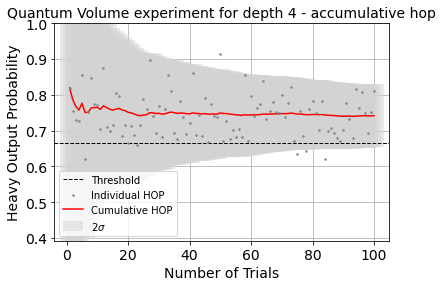

In [3]:
qubits = 4 # Can use specific qubits. for example [2, 4, 7, 10]

qv_exp = QuantumVolume(qubits, seed=42)
# Transpile options like optimization_level affect only the real device run and not the simulation run
# Run options affect both simulation and real device runs
qv_exp.set_transpile_options(optimization_level=3)
expdata = qv_exp.run(backend)
expdata.block_for_results()
# View result data
print(expdata.analysis_results(-1))
display(expdata.figure(0))

### Adding trials

Adding more trials may reduce the error bars to allow passing the threshold (beside the error bars - Quantum Volume experiment must have at least 100 trials to consider successful). <br>
In case you want to add less than 100 additional trials, you can modify the amount of trials added before re-running the experiment.


Analysis Result: QuantumVolume
Analysis Result ID: a364872e-0c53-45aa-a1c9-db9f2b056cdc
Experiment ID: 62ee63e4-654a-4fc5-878f-4d7ac7a5ca51
Device Components: [<Qubit(Q0)>, <Qubit(Q1)>, <Qubit(Q2)>, <Qubit(Q3)>]
Quality: None
Verified: False
Result Data:
- quantum volume: 16
- qv success: True
- confidence: 0.9801643843321528
- heavy output probability: [0.8193359375, 0.75390625, 0.73046875, 0.7255859375, 0.8544921875, 0.6220703125, 0.7529296875, 0.84765625, 0.7734375, 0.7724609375, 0.705078125, 0.875, 0.708984375, 0.69921875, 0.716796875, 0.8046875, 0.7978515625, 0.6845703125, 0.716796875, 0.666015625, 0.712890625, 0.6865234375, 0.6611328125, 0.7158203125, 0.7880859375, 0.7607421875, 0.8984375, 0.7412109375, 0.6943359375, 0.76953125, 0.68359375, 0.76171875, 0.8564453125, 0.8095703125, 0.6923828125, 0.677734375, 0.7841796875, 0.7392578125, 0.69140625, 0.7216796875, 0.8623046875, 0.6875, 0.7431640625, 0.6845703125, 0.7900390625, 0.6689453125, 0.775390625, 0.740234375, 0.73828125, 0.914

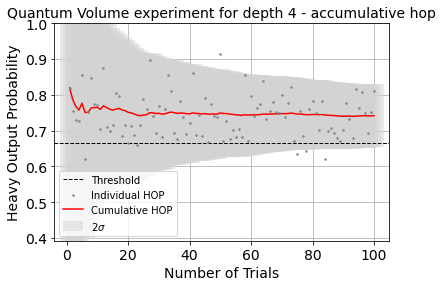

In [4]:
qv_exp.set_experiment_options(trials=60)
expdata2 = qv_exp.run(backend, experiment_data=expdata)
expdata2.block_for_results()
# View result data
print(expdata2.analysis_results(-1))
display(expdata2.figure(0))

### Calculating Quantum Volume using a batch experiment

Run the QV experiment with an increasing number of qubits to check what is the maximum Quantum Volume for the specific device. To reach the real system's Quantum Volume, one must run more trials and additional enhancements might be required (See Ref. [2] for details).

In [5]:
exps = [QuantumVolume(i) for i in range(3,7)]
for exp in exps:
    exp.set_experiment_options(trials=250)
batch_exp = BatchExperiment(exps)
batch_exp.set_transpile_options(optimization_level=3)
batch_expdata = batch_exp.run(backend)
batch_expdata.block_for_results()

Extracting the maximum Quantum Volume.

In [6]:
qv = [batch_expdata.component_experiment_data(i).analysis_results(-1).data()['quantum volume'] 
      for i in range(batch_exp.num_experiments)]
print("Max quantum volume is: " + str(max(qv)))

Max quantum volume is: 16



Analysis Result: QuantumVolume
Analysis Result ID: db964b56-be9b-4750-ac75-bb170796e17c
Experiment ID: ad8db202-19b3-4f5d-b4ab-576d483958ff
Device Components: [<Qubit(Q0)>, <Qubit(Q1)>, <Qubit(Q2)>]
Quality: None
Verified: False
Result Data:
- quantum volume: 8
- qv success: True
- confidence: 0.9999998549399329
- heavy output probability: [0.8603515625, 0.732421875, 0.7705078125, 0.8427734375, 0.705078125, 0.6865234375, 0.693359375, 0.876953125, 0.8203125, 0.6513671875, 0.8173828125, 0.73046875, 0.828125, 0.677734375, 0.8857421875, 0.7626953125, 0.8408203125, 0.84765625, 0.7373046875, 0.814453125, 0.6845703125, 0.8525390625, 0.755859375, 0.837890625, 0.76953125, 0.708984375, 0.6552734375, 0.9892578125, 0.990234375, 0.7529296875, 0.763671875, 0.7158203125, 0.8037109375, 0.712890625, 0.953125, 0.7939453125, 0.7607421875, 0.703125, 0.8671875, 0.990234375, 0.98046875, 0.8818359375, 0.9873046875, 0.724609375, 0.9931640625, 0.7236328125, 0.7783203125, 0.833984375, 0.8154296875, 0.716796875

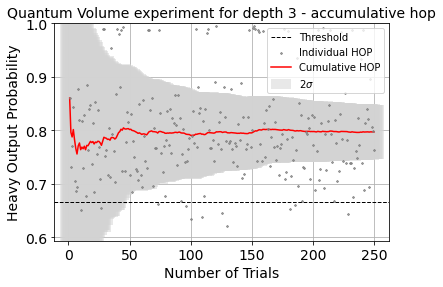


Analysis Result: QuantumVolume
Analysis Result ID: 5dcd290c-5921-4e7f-8b34-4967a0bbb087
Experiment ID: 4ec96e1a-30a7-4972-a408-79f5df244722
Device Components: [<Qubit(Q0)>, <Qubit(Q1)>, <Qubit(Q2)>, <Qubit(Q3)>]
Quality: None
Verified: False
Result Data:
- quantum volume: 16
- qv success: True
- confidence: 0.9958271120516657
- heavy output probability: [0.9111328125, 0.7451171875, 0.7529296875, 0.7685546875, 0.701171875, 0.6748046875, 0.732421875, 0.740234375, 0.837890625, 0.740234375, 0.7568359375, 0.720703125, 0.7421875, 0.76171875, 0.6220703125, 0.7822265625, 0.716796875, 0.7470703125, 0.775390625, 0.6796875, 0.716796875, 0.744140625, 0.7744140625, 0.7099609375, 0.72265625, 0.69140625, 0.638671875, 0.71484375, 0.728515625, 0.732421875, 0.7734375, 0.734375, 0.69140625, 0.7197265625, 0.7529296875, 0.654296875, 0.7041015625, 0.70703125, 0.8828125, 0.6953125, 0.8203125, 0.7607421875, 0.76953125, 0.76953125, 0.66796875, 0.7138671875, 0.728515625, 0.7978515625, 0.8115234375, 0.766601562

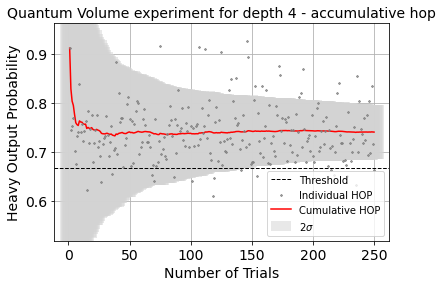


Analysis Result: QuantumVolume
Analysis Result ID: ef4f13ec-aa37-4492-aa81-f7557de04260
Experiment ID: e6ee143d-a5f3-4ccb-8c1b-50f2878489ce
Device Components: [<Qubit(Q0)>, <Qubit(Q1)>, <Qubit(Q2)>, <Qubit(Q3)>, <Qubit(Q4)>]
Quality: None
Verified: False
Result Data:
- quantum volume: 1
- qv success: False
- confidence: 0.9476052579173776
- heavy output probability: [0.748046875, 0.697265625, 0.73828125, 0.7998046875, 0.6787109375, 0.689453125, 0.7392578125, 0.7529296875, 0.708984375, 0.693359375, 0.78125, 0.6982421875, 0.7431640625, 0.6318359375, 0.7216796875, 0.7119140625, 0.66796875, 0.7138671875, 0.7421875, 0.650390625, 0.751953125, 0.69921875, 0.69921875, 0.77734375, 0.7265625, 0.6748046875, 0.705078125, 0.689453125, 0.708984375, 0.6904296875, 0.7705078125, 0.796875, 0.69921875, 0.755859375, 0.806640625, 0.7080078125, 0.7333984375, 0.7001953125, 0.6630859375, 0.7412109375, 0.7294921875, 0.7587890625, 0.6748046875, 0.8193359375, 0.6826171875, 0.69140625, 0.7275390625, 0.7060546875

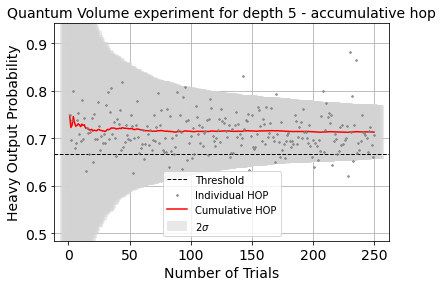


Analysis Result: QuantumVolume
Analysis Result ID: 8879624d-b839-4634-ae9d-1bb848e00a0a
Experiment ID: 55ba2901-754a-42f6-8e53-0ca28afe88cf
Device Components: [<Qubit(Q0)>, <Qubit(Q1)>, <Qubit(Q2)>, <Qubit(Q3)>, <Qubit(Q4)>, <Qubit(Q5)>]
Quality: None
Verified: False
Result Data:
- quantum volume: 1
- qv success: False
- confidence: 0.010544386166357556
- heavy output probability: [0.61328125, 0.6533203125, 0.5986328125, 0.62109375, 0.576171875, 0.576171875, 0.599609375, 0.5810546875, 0.6328125, 0.6259765625, 0.638671875, 0.58203125, 0.5888671875, 0.5771484375, 0.6123046875, 0.5830078125, 0.6025390625, 0.548828125, 0.5693359375, 0.576171875, 0.568359375, 0.5947265625, 0.5888671875, 0.580078125, 0.607421875, 0.6005859375, 0.5947265625, 0.5458984375, 0.6123046875, 0.5908203125, 0.5888671875, 0.587890625, 0.6337890625, 0.609375, 0.5625, 0.578125, 0.5771484375, 0.5703125, 0.5673828125, 0.5498046875, 0.60546875, 0.59765625, 0.6171875, 0.5634765625, 0.6357421875, 0.5556640625, 0.5283203125,

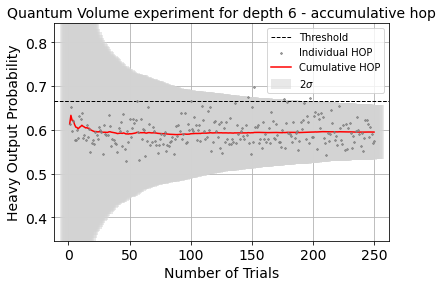

In [7]:
for i in range(batch_exp.num_experiments):
    print(batch_expdata.component_experiment_data(i).analysis_results(-1))
    display(batch_expdata.component_experiment_data(i).figure(0))

### References 

[1] Andrew W. Cross, Lev S. Bishop, Sarah Sheldon, Paul D. Nation, and Jay M. Gambetta, Validating quantum computers using randomized model circuits, Phys. Rev. A 100, 032328 (2019). https://arxiv.org/pdf/1811.12926

[2] Petar Jurcevic et. al. Demonstration of quantum volume 64 on asuperconducting quantum computing system, 
https://arxiv.org/pdf/2008.08571
